In [1]:
#!pip install --upgrade numpy

In [2]:
#!pip install seaborn==0.11.2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("train.csv")

In [5]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
#Vamos a separar el PassengerId en 2 columnas ("grupo" y "Id dentro del grupo")
data[["group_Id","ID"]]=data["PassengerId"].str.split("_",expand=True)

In [7]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group_Id,ID
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01


In [8]:
data[data["HomePlanet"].isna()]
#Vemos que hay 201 Nan en la columna "HomePlanet"

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group_Id,ID
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True,0064,02
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False,0119,01
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True,0210,01
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,0242,01
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True,0251,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,9084,01
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,9194,01
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,9248,01
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,9257,01


In [9]:
result=data.groupby("group_Id")["HomePlanet"].nunique()
result[result>1]

#Vemos que todos los miembros de un mismo grupo salen del mismo HomePlanet

Series([], Name: HomePlanet, dtype: int64)

In [10]:
#Rellenamos Nan teniendo en cuenta que si hay alguien de ese mismo grupo con el campo "HomePlanet" completado, probablemente vengan del mismo origen
data["HomePlanet"] = data.groupby("group_Id")["HomePlanet"].fillna(method='ffill')

In [11]:
#Hago lo mismo para el resto de columnas
data["CryoSleep"] = data.groupby("group_Id")["CryoSleep"].fillna(method='ffill')
data["Cabin"] = data.groupby("group_Id")["Cabin"].fillna(method='ffill')
data["Destination"] = data.groupby("group_Id")["Destination"].fillna(method='ffill')
data["VIP"] = data.groupby("group_Id")["VIP"].fillna(method='ffill')

In [12]:
data[data["HomePlanet"].isna()]
#Aún tenemos 142 Nan

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group_Id,ID
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False,0119,01
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True,0210,01
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,0242,01
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True,0251,01
274,0303_01,NaN,True,G/41/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Oraryn Kirklander,True,0303,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,9084,01
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,9194,01
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,9248,01
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,9257,01


In [13]:
#Voy a separar la información de Cabin, por si tuviera alguna influencia
data[["Cabin_Deck","Cabin_Num","Cabin_side"]]=data["Cabin"].str.split("/",expand=True)

In [14]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group_Id,ID,Cabin_Deck,Cabin_Num,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,E,608,S


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8551 non-null   object 
 2   CryoSleep     8542 non-null   object 
 3   Cabin         8559 non-null   object 
 4   Destination   8561 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8545 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  group_Id      8693 non-null   object 
 15  ID            8693 non-null   object 
 16  Cabin_Deck    8559 non-null   object 
 17  Cabin_Num     8559 non-null   object 
 18  Cabin_side    8559 non-null 

In [16]:
data['HomePlanet_num'] = -1

data.loc[data['HomePlanet'] == 'Mars', 'HomePlanet_num'] = 0
data.loc[data['HomePlanet'] == 'Europa', 'HomePlanet_num'] = 1
data.loc[data['HomePlanet'] == 'Earth', 'HomePlanet_num'] = 2

In [17]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group_Id,ID,Cabin_Deck,Cabin_Num,Cabin_side,HomePlanet_num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,A,98,P,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,G,1499,S,2
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,G,1500,S,2
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,E,608,S,1


In [18]:
#Hago lo mismo con la columna "Cryosleep"
data["CryoSleep"].unique()

array([False, True, nan], dtype=object)

In [19]:
data["CryoSleep"].value_counts()

False    5478
True     3064
Name: CryoSleep, dtype: int64

In [20]:
data["Cryosleep_num"] = -1

data.loc[data['CryoSleep'] == False, 'Cryosleep_num'] = 0
data.loc[data['CryoSleep'] == True, 'Cryosleep_num'] = 1

In [21]:
#Hago lo mismo con la columna "Destination"
data["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [22]:
data["Destination"].value_counts()

TRAPPIST-1e      5948
55 Cancri e      1809
PSO J318.5-22     804
Name: Destination, dtype: int64

In [23]:
data['Destination_num'] = -1

data.loc[data['Destination'] == 'PSO J318.5-22', 'Destination_num'] = 0
data.loc[data['Destination'] == '55 Cancri e', 'Destination_num'] = 1
data.loc[data['Destination'] == 'TRAPPIST-1e', 'Destination_num'] = 2

In [24]:
#Hago lo mismo con la columna "VIP"
data["VIP"].unique()

array([False, True, nan], dtype=object)

In [25]:
data['VIP_num'] = -1

data.loc[data['VIP'] == False, 'VIP_num'] = 0
data.loc[data['VIP'] == True, 'VIP_num'] = 1

In [26]:
data["Cabin_Num"]

0          0
1          0
2          0
3          0
4          1
        ... 
8688      98
8689    1499
8690    1500
8691     608
8692     608
Name: Cabin_Num, Length: 8693, dtype: object

In [27]:
#Transformo el "group_Id" a numérico
data['group_Id'] = data['group_Id'].astype(int)


In [28]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'group_Id', 'ID', 'Cabin_Deck', 'Cabin_Num',
       'Cabin_side', 'HomePlanet_num', 'Cryosleep_num', 'Destination_num',
       'VIP_num'],
      dtype='object')

In [29]:
#Transformo a numérico "Cabin Deck"
data["Cabin_Deck"].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [30]:
data['Cabin_Deck_num'] = -1

data.loc[data['Cabin_Deck'] == 'A', 'Cabin_Deck_num'] = 0
data.loc[data['Cabin_Deck'] == 'B', 'Cabin_Deck_num'] = 1
data.loc[data['Cabin_Deck'] == 'C', 'Cabin_Deck_num'] = 2
data.loc[data['Cabin_Deck'] == 'D', 'Cabin_Deck_num'] = 3
data.loc[data['Cabin_Deck'] == 'E', 'Cabin_Deck_num'] = 4
data.loc[data['Cabin_Deck'] == 'F', 'Cabin_Deck_num'] = 5
data.loc[data['Cabin_Deck'] == 'G', 'Cabin_Deck_num'] = 6
data.loc[data['Cabin_Deck'] == 'T', 'Cabin_Deck_num'] = 7

In [31]:
#Transformo a numérico "Cabin side"
data["Cabin_side"].unique()

array(['P', 'S', None, nan], dtype=object)

In [32]:
data['Cabin_side_num'] = -1

data.loc[data['Cabin_side'] == "P", 'Cabin_side_num'] = 0
data.loc[data['Cabin_side'] == "S", 'Cabin_side_num'] = 1

In [33]:
#Paso la columna objetivo "Transported" al final del df
columnas = list(data.columns)
columnas.remove("Transported")

columnas.append("Transported")

data = data[columnas]

<AxesSubplot:>

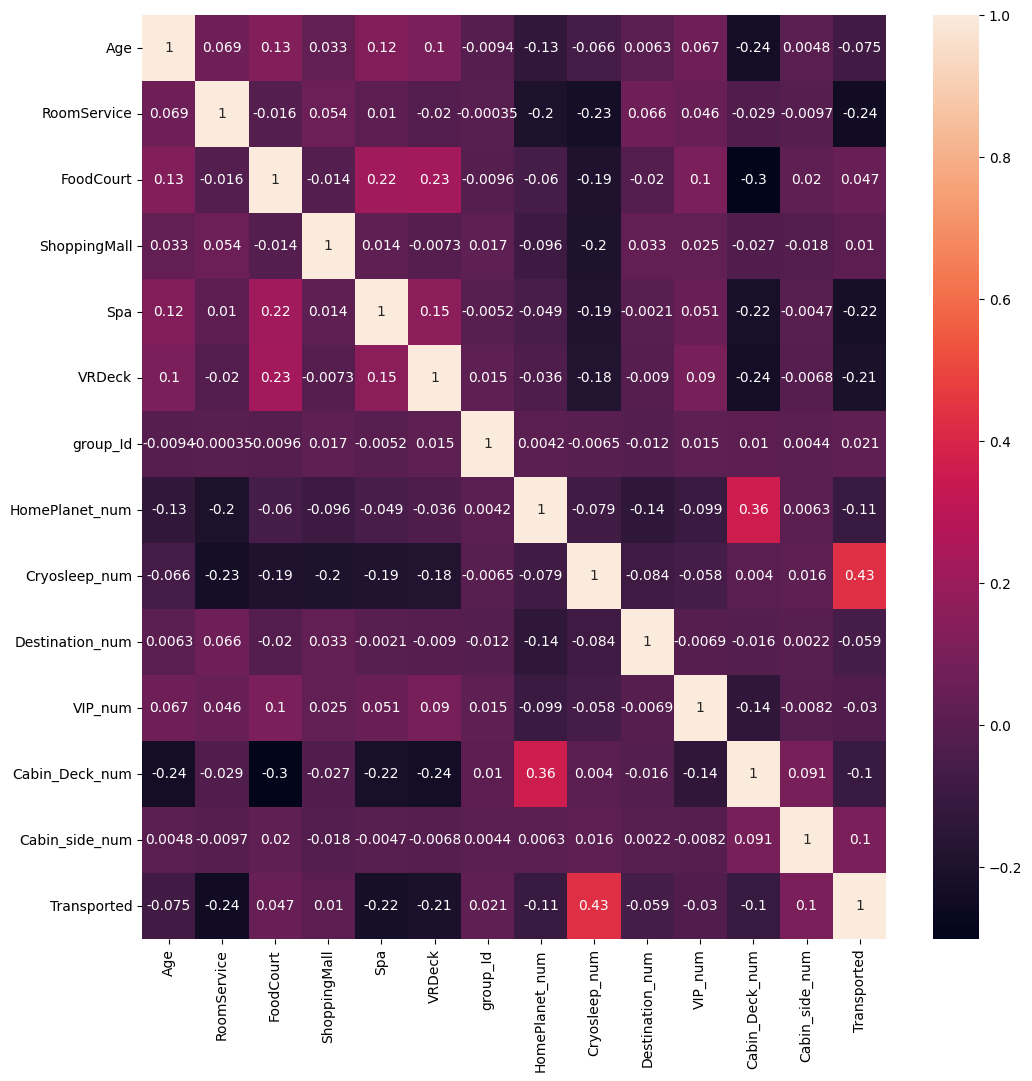

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8551 non-null   object 
 2   CryoSleep        8542 non-null   object 
 3   Cabin            8559 non-null   object 
 4   Destination      8561 non-null   object 
 5   Age              8514 non-null   float64
 6   VIP              8545 non-null   object 
 7   RoomService      8512 non-null   float64
 8   FoodCourt        8510 non-null   float64
 9   ShoppingMall     8485 non-null   float64
 10  Spa              8510 non-null   float64
 11  VRDeck           8505 non-null   float64
 12  Name             8493 non-null   object 
 13  group_Id         8693 non-null   int32  
 14  ID               8693 non-null   object 
 15  Cabin_Deck       8559 non-null   object 
 16  Cabin_Num        8559 non-null   object 
 17  Cabin_side    

In [36]:
#Sustituyo los Nan de las columnas de pagos por su moda (que presumiblemente será 0)
from scipy.stats import mode

# Calcular la moda de cada columna
room_service_mode = data['RoomService'].mode()[0]
food_court_mode = data['FoodCourt'].mode()[0]
shopping_mall_mode = data['ShoppingMall'].mode()[0]
spa_mode = data['Spa'].mode()[0]
vr_deck_mode = data['VRDeck'].mode()[0]

# Sustituir los NaN por la moda en cada columna
data['RoomService'].fillna(room_service_mode, inplace=True)
data['FoodCourt'].fillna(food_court_mode, inplace=True)
data['ShoppingMall'].fillna(shopping_mall_mode, inplace=True)
data['Spa'].fillna(spa_mode, inplace=True)
data['VRDeck'].fillna(vr_deck_mode, inplace=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [37]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'group_Id', 'ID', 'Cabin_Deck', 'Cabin_Num', 'Cabin_side',
       'HomePlanet_num', 'Cryosleep_num', 'Destination_num', 'VIP_num',
       'Cabin_Deck_num', 'Cabin_side_num', 'Transported'],
      dtype='object')

In [38]:
#Sustituyo los Nan por la moda
data['HomePlanet_num'].fillna(data['HomePlanet_num'].mode()[0], inplace=True)
data['Cryosleep_num'].fillna(data['Cryosleep_num'].mode()[0], inplace=True)
data['Destination_num'].fillna(data['Destination_num'].mode()[0], inplace=True)
data['VIP_num'].fillna(data['VIP_num'].mode()[0], inplace=True)
data['Cabin_Deck_num'].fillna(data['Cabin_Deck_num'].mode()[0], inplace=True)
data['Cabin_side_num'].fillna(data['Cabin_side_num'].mode()[0], inplace=True)
data['Cabin_side_num'].fillna(data['Cabin_side_num'].mode()[0], inplace=True)

In [40]:
#Quito Nan y paso a numérico "Cabin_Num"
data['Cabin_Num'] = data['Cabin_Num'].fillna(0)
data["Cabin_Num"]=data["Cabin_Num"].astype(int)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8551 non-null   object 
 2   CryoSleep        8542 non-null   object 
 3   Cabin            8559 non-null   object 
 4   Destination      8561 non-null   object 
 5   Age              8514 non-null   float64
 6   VIP              8545 non-null   object 
 7   RoomService      8693 non-null   float64
 8   FoodCourt        8693 non-null   float64
 9   ShoppingMall     8693 non-null   float64
 10  Spa              8693 non-null   float64
 11  VRDeck           8693 non-null   float64
 12  Name             8493 non-null   object 
 13  group_Id         8693 non-null   int32  
 14  ID               8693 non-null   object 
 15  Cabin_Deck       8559 non-null   object 
 16  Cabin_Num        8693 non-null   int32  
 17  Cabin_side    

In [42]:
#Elimino las columnas que no me interesan
data.drop(columns={"HomePlanet","CryoSleep","Cabin","Destination","Age","VIP","Name","Cabin_Deck","Cabin_side"},inplace=True)

In [43]:
data.info()
#De esta forma no he perdido filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   RoomService      8693 non-null   float64
 2   FoodCourt        8693 non-null   float64
 3   ShoppingMall     8693 non-null   float64
 4   Spa              8693 non-null   float64
 5   VRDeck           8693 non-null   float64
 6   group_Id         8693 non-null   int32  
 7   ID               8693 non-null   object 
 8   Cabin_Num        8693 non-null   int32  
 9   HomePlanet_num   8693 non-null   int64  
 10  Cryosleep_num    8693 non-null   int64  
 11  Destination_num  8693 non-null   int64  
 12  VIP_num          8693 non-null   int64  
 13  Cabin_Deck_num   8693 non-null   int64  
 14  Cabin_side_num   8693 non-null   int64  
 15  Transported      8693 non-null   bool   
dtypes: bool(1), float64(5), int32(2), int64(6), object(2)
memory

<AxesSubplot:>

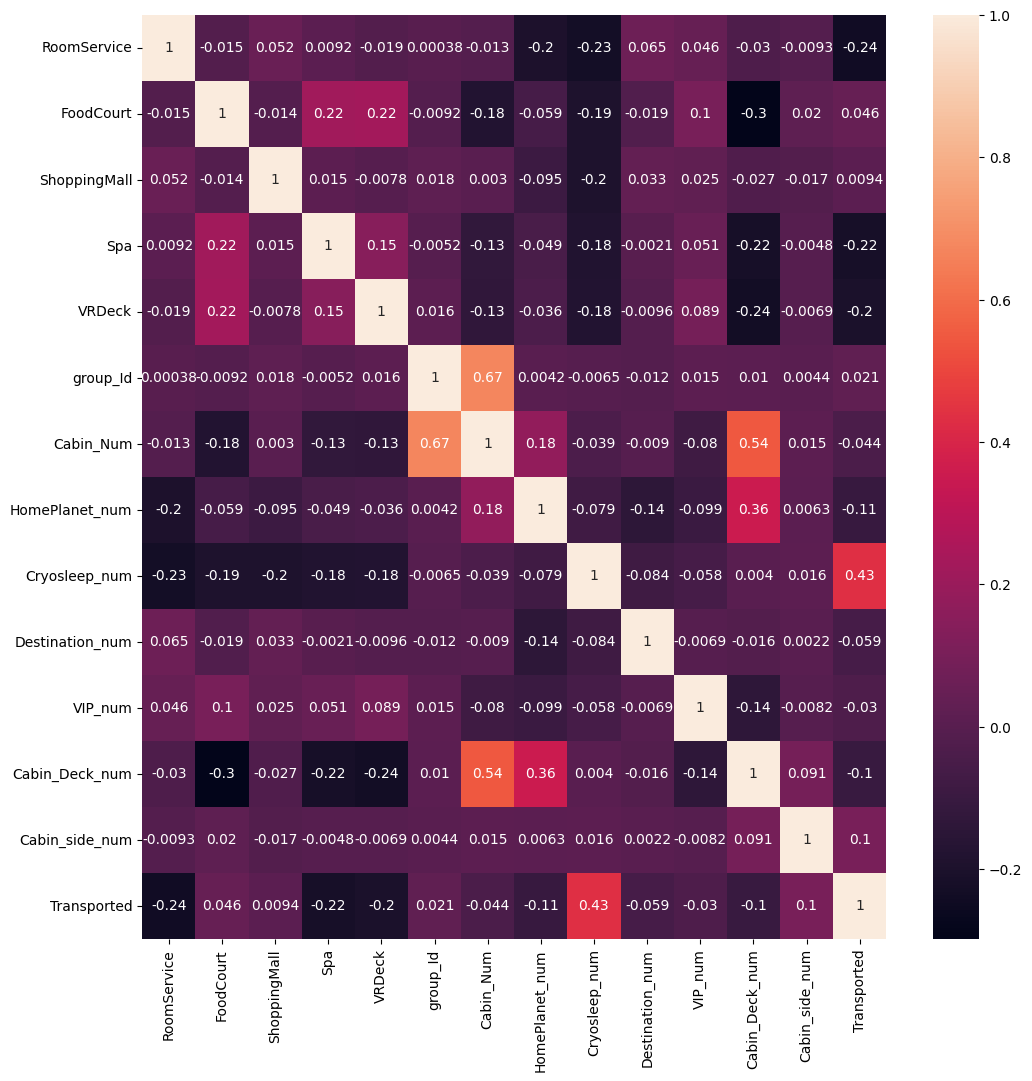

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

Podemos considerar que la data está limpia ya

In [45]:
X=data.copy()
X.drop(columns={"Transported"},inplace=True)
Y=data["Transported"]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [47]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6954, 15)
(1739, 15)
(6954,)
(1739,)


In [49]:
from sklearn.metrics import accuracy_score

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(max_depth=3,random_state=42)

bag_clf = BaggingClassifier(
    base_estimator = estimator,
    n_estimators=300, # Cantidad de árboles
    max_samples=100, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping
    # max_features = 3 # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=42)


bag_clf.fit(X_train, Y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7751581368602645

In [51]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 max_depth=25,
                                 random_state=42)
rnd_clf.fit(X_train, Y_train)

y_pred_rf = rnd_clf.predict(X_test)
# np.sum(y_test == y_pred_rf) / len(y_test) 
accuracy_score(Y_test, y_pred_rf)

0.7751581368602645

In [52]:
from sklearn.ensemble import AdaBoostClassifier

estimator = DecisionTreeClassifier(max_depth=1)

ada_clf = AdaBoostClassifier(base_estimator = estimator,
                             n_estimators=200,
                             learning_rate=0.5,
                             random_state=42)

ada_clf.fit(X_train, Y_train)

y_pred = ada_clf.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7780333525014376

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gbct = GradientBoostingClassifier(max_depth=2,
                                 n_estimators=100,
                                 learning_rate=1.0,
                                 random_state=42)
gbct.fit(X_train, Y_train)


y_pred_gbct = gbct.predict(X_test)
accuracy_score(Y_test, y_pred_gbct)

0.7832087406555491

In [54]:
import xgboost

X_train_xgb=X_train.drop(columns={"PassengerId", "ID"})
X_test_xgb=X_test.drop(columns={"PassengerId", "ID"})

xgb_clas = xgboost.XGBRFClassifier(random_state=42)

xgb_clas.fit(X_train_xgb, Y_train)
y_pred = xgb_clas.predict(X_test_xgb)
accuracy_score(Y_test, y_pred)

0.7757331799884991

Entreno con toda la data y saco los resultados

In [55]:
estimator = DecisionTreeClassifier(max_depth=3,random_state=42)

bag_clf_2 = BaggingClassifier(
    base_estimator = estimator,
    n_estimators=300, # Cantidad de árboles
    max_samples=100, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping
    # max_features = 3 # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=42)


bag_clf_2.fit(X, Y)
y_pred_2 = bag_clf_2.predict(X)
accuracy_score(Y, y_pred_2)

0.779592775796618

In [56]:
rnd_clf_2 = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 max_depth=25,
                                 random_state=42)
rnd_clf_2.fit(X, Y)

y_pred_rf_2 = rnd_clf_2.predict(X)
accuracy_score(Y, y_pred_rf_2)

0.7784424249396066

In [57]:
estimator = DecisionTreeClassifier(max_depth=1)

ada_clf_2 = AdaBoostClassifier(base_estimator = estimator,
                             n_estimators=200,
                             learning_rate=0.5,
                             random_state=42)

ada_clf_2.fit(X, Y)

y_pred_2 = ada_clf_2.predict(X)
accuracy_score(Y, y_pred_2)

0.8040952490509605

In [58]:
gbct_2 = GradientBoostingClassifier(max_depth=2,
                                 n_estimators=100,
                                 learning_rate=1.0,
                                 random_state=42)
gbct_2.fit(X, Y)


y_pred_gbct_2 = gbct_2.predict(X)
accuracy_score(Y, y_pred_gbct_2)

0.8417117220752329

In [60]:
X_xgb=X.drop(columns={"PassengerId", "ID"})


xgb_clas_2 = xgboost.XGBRFClassifier(random_state=42)

xgb_clas_2.fit(X_xgb, Y)
y_pred_2 = xgb_clas_2.predict(X_xgb)
accuracy_score(Y, y_pred_2)

0.800299091222823

Hago el predict con el GradientBoost que es el que mejor resultado me ha dado

In [61]:
df_test=pd.read_csv("test.csv")

In [62]:
df_test[["group_Id","ID"]]=df_test["PassengerId"].str.split("_",expand=True)

df_test["HomePlanet"] = df_test.groupby("group_Id")["HomePlanet"].fillna(method='ffill')
df_test["CryoSleep"] = df_test.groupby("group_Id")["CryoSleep"].fillna(method='ffill')
df_test["Cabin"] = df_test.groupby("group_Id")["Cabin"].fillna(method='ffill')
df_test["Destination"] = df_test.groupby("group_Id")["Destination"].fillna(method='ffill')
df_test["VIP"] = df_test.groupby("group_Id")["VIP"].fillna(method='ffill')

df_test[["Cabin_Deck","Cabin_Num","Cabin_side"]]=df_test["Cabin"].str.split("/",expand=True)

df_test['HomePlanet_num'] = -1
df_test.loc[df_test['HomePlanet'] == 'Mars', 'HomePlanet_num'] = 0
df_test.loc[df_test['HomePlanet'] == 'Europa', 'HomePlanet_num'] = 1
df_test.loc[df_test['HomePlanet'] == 'Earth', 'HomePlanet_num'] = 2

df_test["Cryosleep_num"] = -1
df_test.loc[df_test['CryoSleep'] == False, 'Cryosleep_num'] = 0
df_test.loc[df_test['CryoSleep'] == True, 'Cryosleep_num'] = 1

df_test['Destination_num'] = -1
df_test.loc[df_test['Destination'] == 'PSO J318.5-22', 'Destination_num'] = 0
df_test.loc[df_test['Destination'] == '55 Cancri e', 'Destination_num'] = 1
df_test.loc[df_test['Destination'] == 'TRAPPIST-1e', 'Destination_num'] = 2

df_test['VIP_num'] = -1
df_test.loc[df_test['VIP'] == False, 'VIP_num'] = 0
df_test.loc[df_test['VIP'] == True, 'VIP_num'] = 1

df_test['group_Id'] = df_test['group_Id'].astype(int)

df_test['Cabin_Deck_num'] = -1
df_test.loc[df_test['Cabin_Deck'] == 'A', 'Cabin_Deck_num'] = 0
df_test.loc[df_test['Cabin_Deck'] == 'B', 'Cabin_Deck_num'] = 1
df_test.loc[df_test['Cabin_Deck'] == 'C', 'Cabin_Deck_num'] = 2
df_test.loc[df_test['Cabin_Deck'] == 'D', 'Cabin_Deck_num'] = 3
df_test.loc[df_test['Cabin_Deck'] == 'E', 'Cabin_Deck_num'] = 4
df_test.loc[df_test['Cabin_Deck'] == 'F', 'Cabin_Deck_num'] = 5
df_test.loc[df_test['Cabin_Deck'] == 'G', 'Cabin_Deck_num'] = 6
df_test.loc[df_test['Cabin_Deck'] == 'T', 'Cabin_Deck_num'] = 7

df_test['Cabin_side_num'] = -1
df_test.loc[df_test['Cabin_side'] == "P", 'Cabin_side_num'] = 0
df_test.loc[df_test['Cabin_side'] == "S", 'Cabin_side_num'] = 1

room_service_mode = df_test['RoomService'].mode()[0]
food_court_mode = df_test['FoodCourt'].mode()[0]
shopping_mall_mode = df_test['ShoppingMall'].mode()[0]
spa_mode = df_test['Spa'].mode()[0]
vr_deck_mode = df_test['VRDeck'].mode()[0]
df_test['RoomService'].fillna(room_service_mode, inplace=True)
df_test['FoodCourt'].fillna(food_court_mode, inplace=True)
df_test['ShoppingMall'].fillna(shopping_mall_mode, inplace=True)
df_test['Spa'].fillna(spa_mode, inplace=True)
df_test['VRDeck'].fillna(vr_deck_mode, inplace=True)

df_test['Cabin_Num'] = df_test['Cabin_Num'].fillna(0) #Sustituyo los "None" por 0

df_test["Cabin_Num"]=df_test["Cabin_Num"].astype(int)

df_test.drop(columns={"HomePlanet","CryoSleep","Cabin","Destination","Age","VIP","Name","Cabin_Deck","Cabin_side"},inplace=True)

In [63]:
gbct_pred=gbct_2.predict(df_test)
gbct_solution=df_test[["PassengerId"]]
gbct_solution["Transported"]=gbct_pred
gbct_solution.to_csv("gbct_solution.csv",index=False)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
